In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sym
import copy

In [20]:
# function
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative 
def deriv(x):
  return 6*x - 3

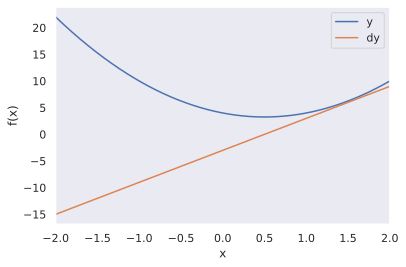

In [21]:
# plot both of them
sns.set_theme()
x = np.linspace(-2,2,2001)

plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

# Gradient descent

In [22]:
localmin = np.random.choice(x,1) #random start point
learning_rate = .01
training_epochs = 100

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

array([0.49836843])

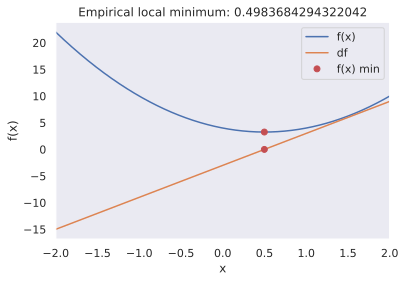

In [23]:
from IPython import display
display.set_matplotlib_formats('svg') #vector instead of raster

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

In [24]:
localmin = np.random.choice(x,1)

learning_rate = .01
training_epochs = 100

modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = localmin,grad


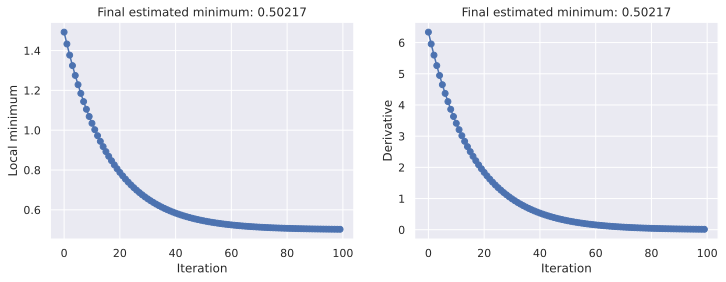

In [25]:
# grad v/s iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [26]:
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  
  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

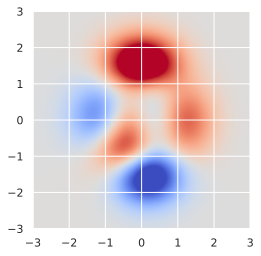

In [35]:
# landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='top', cmap = 'coolwarm')
plt.show()

In [28]:
xx,yy = np.meshgrid(x,y)
yy

array([[-3.  , -3.  , -3.  , ..., -3.  , -3.  , -3.  ],
       [-2.97, -2.97, -2.97, ..., -2.97, -2.97, -2.97],
       [-2.94, -2.94, -2.94, ..., -2.94, -2.94, -2.94],
       ...,
       [ 2.94,  2.94,  2.94, ...,  2.94,  2.94,  2.94],
       [ 2.97,  2.97,  2.97, ...,  2.97,  2.97,  2.97],
       [ 3.  ,  3.  ,  3.  , ...,  3.  ,  3.  ,  3.  ]])

In [29]:
# derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

In [30]:
localmin = np.random.rand(2)*4-2 # random starting point 
startpnt = copy.deepcopy(localmin) # deepcopy here to preserve both values

# print(id(localmin)) 
# print(id(startpnt)), print(' ')

learning_rate = .01
training_epochs = 1000

trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmin[0],localmin[1]).evalf(), df_y(localmin[0],localmin[1]).evalf() ])
  localmin = localmin - learning_rate*grad 
  trajectory[i,:] = localmin


print(localmin)
print(startpnt), print(' ')

[-1.34739624436821 0.204518866097005]
[-1.66115387 -1.38377935]
 


(None, None)

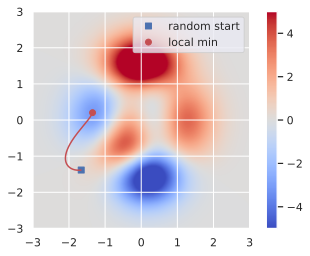

In [36]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='top',cmap = 'coolwarm')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['random start','local min'])
plt.colorbar()
plt.show()

#Visualization in 3D




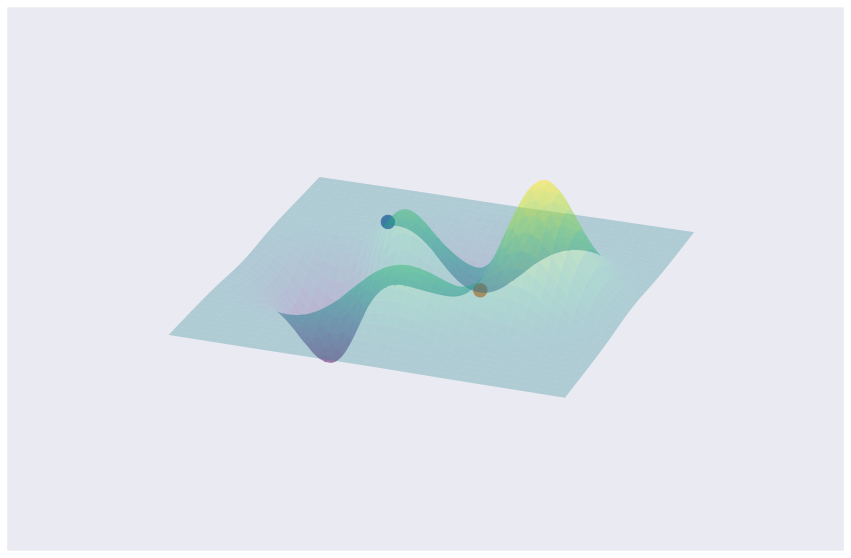

In [32]:
fig = plt.figure(figsize=(15,10))
ax  = plt.axes(projection='3d')

xx,yy = np.meshgrid(x,y)

surf = ax.plot_surface(xx,yy,Z,cmap='viridis',alpha=.3,linewidth=0)

ax.scatter(startpnt[0],startpnt[1],peaks(startpnt[0],startpnt[1]),'bs',s=180, zorder=10)
ax.scatter(localmin[0],localmin[1],peaks(float(localmin[0]),float(localmin[1])),'ro',s=180, zorder=10)

ax.view_init(40,20)
ax.axis('off')
plt.show()